In [23]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.models import Sequential,Model
from keras.layers import Dense, Activation, Input, Dropout
from keras.layers.advanced_activations import LeakyReLU
import time

In [24]:
mnist_images = tf.keras.datasets.mnist.load_data()

In [25]:
train_mnist_images = mnist_images[0][0]
train_mnist_labels = mnist_images[0][1]
test_mnist_images = mnist_images[1][0]
test_mnist_labels = mnist_images[1][1]

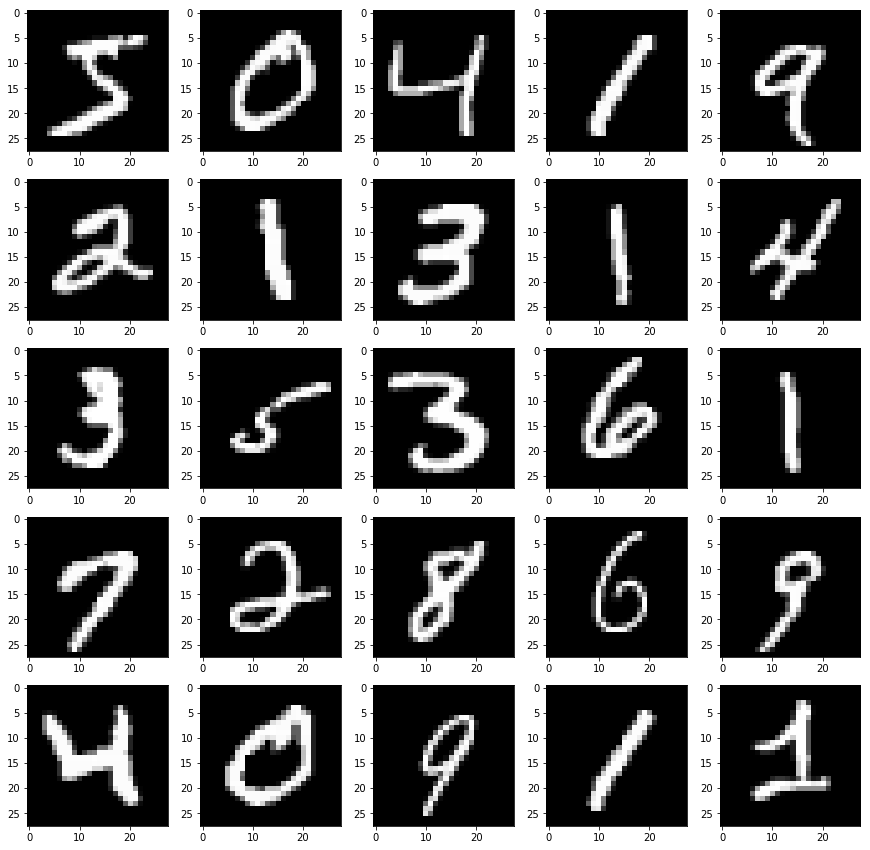

In [26]:
# test  = train_mnist_images[0]
# print (test.shape)
fig, ax = plt.subplots(nrows=5,ncols=5,figsize=(15,15))

cnt =0
for i in range(5):
    for j in range(5):
        ax[i,j].imshow(train_mnist_images[cnt],cmap='gray')
        cnt = cnt+1
        
        
        
plt.show()

In [27]:
train_mnist_images[0].shape # 28 x 28

(28, 28)

In [28]:
train_mnist_images = train_mnist_images.reshape(train_mnist_images.shape[0], 28, 28, 1).astype('float32')
train_mnist_images = (train_mnist_images - 127.5) / 127.5 
train_mnist_images = train_mnist_images.reshape(train_mnist_images.shape[0],
                                                train_mnist_images.shape[1]*train_mnist_images.shape[2])

In [29]:
noise_dim =100
image_dim = 784
#random_noise = np.random.normal(size=noise_dim)

def generator_model():
    model_gen = Sequential()
    model_gen.add(Dense(200, input_dim=noise_dim))
    model_gen.add(LeakyReLU(alpha=0.5))
    #model_gen.add(Activation('relu'))
    model_gen.add(Dense(600))
    model_gen.add(LeakyReLU(alpha=0.5))
    #model_gen.add(Activation('relu'))
    model_gen.add(Dense(1200))
    model_gen.add(LeakyReLU(alpha=0.5))
    #model_gen.add(Activation('relu'))
    model_gen.add(Dense(image_dim,activation='tanh'))
    return model_gen

# test_g = model_gen()
# print (test_g.summary())
def discriminator_model():
    model_disc = Sequential()
    model_disc.add(Dense(1200, input_shape=(784,)))
    model_disc.add(LeakyReLU(alpha=0.5))
    model_disc.add(Dropout(0.3))
    #model_disc.add(Activation('relu'))
    model_disc.add(Dense(600))
    model_disc.add(LeakyReLU(alpha=0.5))
    model_disc.add(Dropout(0.3))
    #model_disc.add(Activation('relu'))
    model_disc.add(Dense(200))
    model_disc.add(LeakyReLU(alpha=0.5))
    #model_disc.add(Activation('relu'))
    #model_disc.add(Flatten())
    model_disc.add(Dense(1,activation='sigmoid'))
    opt = Adam(lr=0.0002, beta_1=0.5)
    model_disc.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model_disc 

# model_test = discriminator_model()
# model_test.summary()


In [30]:
np.random.normal(size=(4,3))

array([[-0.15149743, -0.75937348, -0.25077683],
       [ 0.22377992,  3.18189338, -0.74393479],
       [ 0.37863359, -0.14665024, -2.41969183],
       [-1.33697061, -0.3951533 , -0.44721205]])

In [31]:
#adversarial training

def adversarial_training(G, D):
    D.trainable = False
    noise_vec = Input(shape=(noise_dim,))
    g_z = G(noise_vec)
    d_g_z = D(g_z)
    gan = Model(noise_vec,d_g_z)
    opt = Adam(lr=0.0001)
    gan.compile(loss='binary_crossentropy',optimizer = opt , metrics = ['accuracy'])
    return gan



G = generator_model()
D = discriminator_model()
print(G.summary())
print(D.summary())


gan = adversarial_training(G,D)

print (gan.summary())
    
print (D.metrics_names)
print (gan.metrics_names)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 200)               20200     
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 200)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 600)               120600    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 600)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1200)              721200    
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 1200)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 784)               941584    
Total para

In [19]:
import numpy as np
np.random.randint(0, 10, 4)

array([2, 7, 8, 6])

Epoch=  1000  Discriminator Loss = 0.264  Discriminator Accuracy = 0.500  Generator Loss = 1.999  Generator Accuracy = 0.005
Epoch=  2000  Discriminator Loss = 0.343  Discriminator Accuracy = 0.500  Generator Loss = 2.040  Generator Accuracy = 0.010
Epoch=  3000  Discriminator Loss = 0.317  Discriminator Accuracy = 0.495  Generator Loss = 2.380  Generator Accuracy = 0.005
Epoch=  4000  Discriminator Loss = 0.312  Discriminator Accuracy = 0.490  Generator Loss = 1.869  Generator Accuracy = 0.035
Epoch=  5000  Discriminator Loss = 0.341  Discriminator Accuracy = 0.490  Generator Loss = 2.177  Generator Accuracy = 0.040


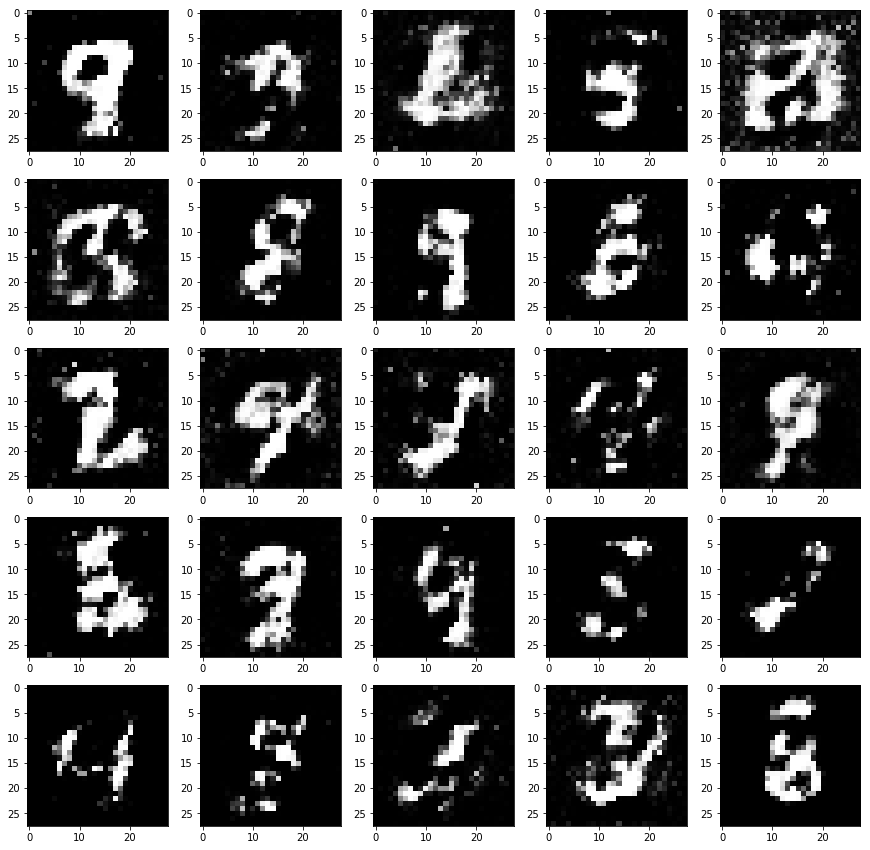

Epoch=  6000  Discriminator Loss = 0.327  Discriminator Accuracy = 0.487  Generator Loss = 2.096  Generator Accuracy = 0.055
Epoch=  7000  Discriminator Loss = 0.332  Discriminator Accuracy = 0.487  Generator Loss = 2.227  Generator Accuracy = 0.005
Epoch=  8000  Discriminator Loss = 0.314  Discriminator Accuracy = 0.497  Generator Loss = 2.337  Generator Accuracy = 0.010
Epoch=  9000  Discriminator Loss = 0.384  Discriminator Accuracy = 0.435  Generator Loss = 1.525  Generator Accuracy = 0.180
Epoch=  10000  Discriminator Loss = 0.357  Discriminator Accuracy = 0.480  Generator Loss = 2.057  Generator Accuracy = 0.050


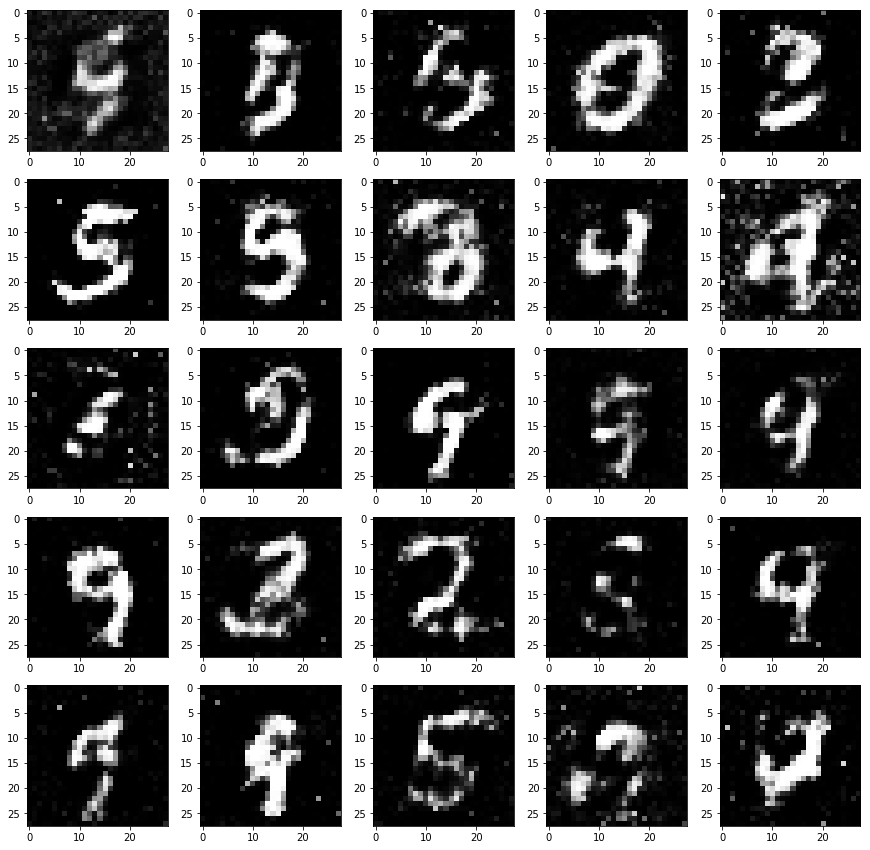

Epoch=  11000  Discriminator Loss = 0.348  Discriminator Accuracy = 0.475  Generator Loss = 1.561  Generator Accuracy = 0.080
Epoch=  12000  Discriminator Loss = 0.350  Discriminator Accuracy = 0.485  Generator Loss = 1.863  Generator Accuracy = 0.110
Epoch=  13000  Discriminator Loss = 0.361  Discriminator Accuracy = 0.450  Generator Loss = 1.673  Generator Accuracy = 0.045
Epoch=  14000  Discriminator Loss = 0.385  Discriminator Accuracy = 0.470  Generator Loss = 1.836  Generator Accuracy = 0.120
Epoch=  15000  Discriminator Loss = 0.383  Discriminator Accuracy = 0.477  Generator Loss = 1.864  Generator Accuracy = 0.050


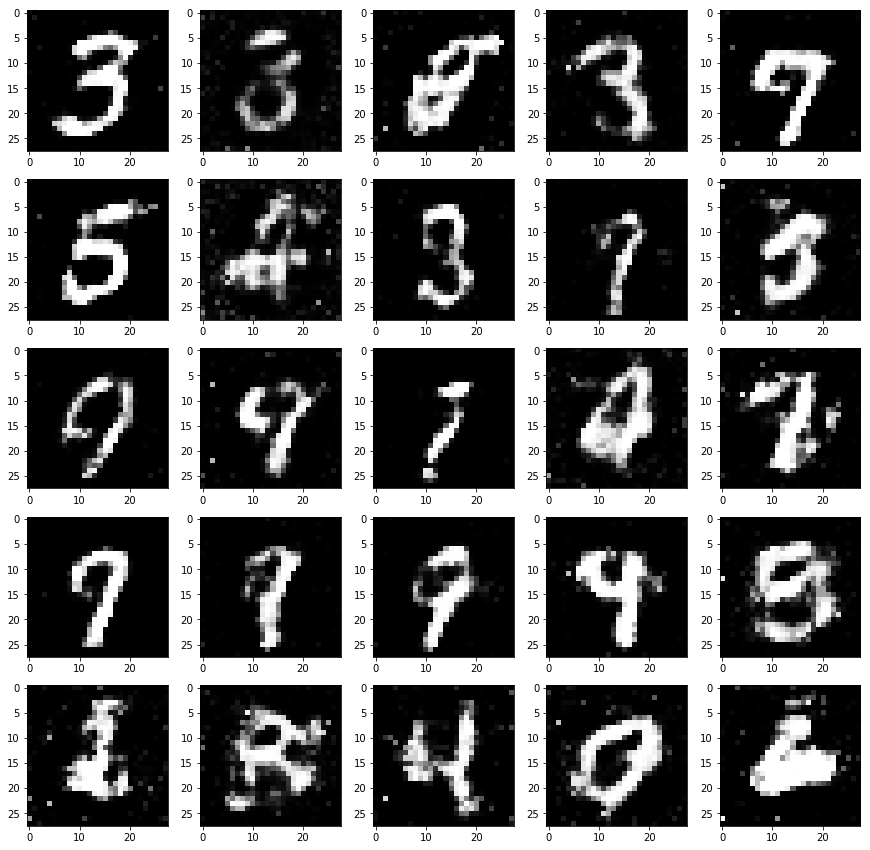

Epoch=  16000  Discriminator Loss = 0.368  Discriminator Accuracy = 0.463  Generator Loss = 1.692  Generator Accuracy = 0.115
Epoch=  17000  Discriminator Loss = 0.336  Discriminator Accuracy = 0.482  Generator Loss = 1.888  Generator Accuracy = 0.065
Epoch=  18000  Discriminator Loss = 0.360  Discriminator Accuracy = 0.475  Generator Loss = 1.614  Generator Accuracy = 0.110
Epoch=  19000  Discriminator Loss = 0.365  Discriminator Accuracy = 0.468  Generator Loss = 1.888  Generator Accuracy = 0.075
Epoch=  20000  Discriminator Loss = 0.370  Discriminator Accuracy = 0.472  Generator Loss = 1.798  Generator Accuracy = 0.035


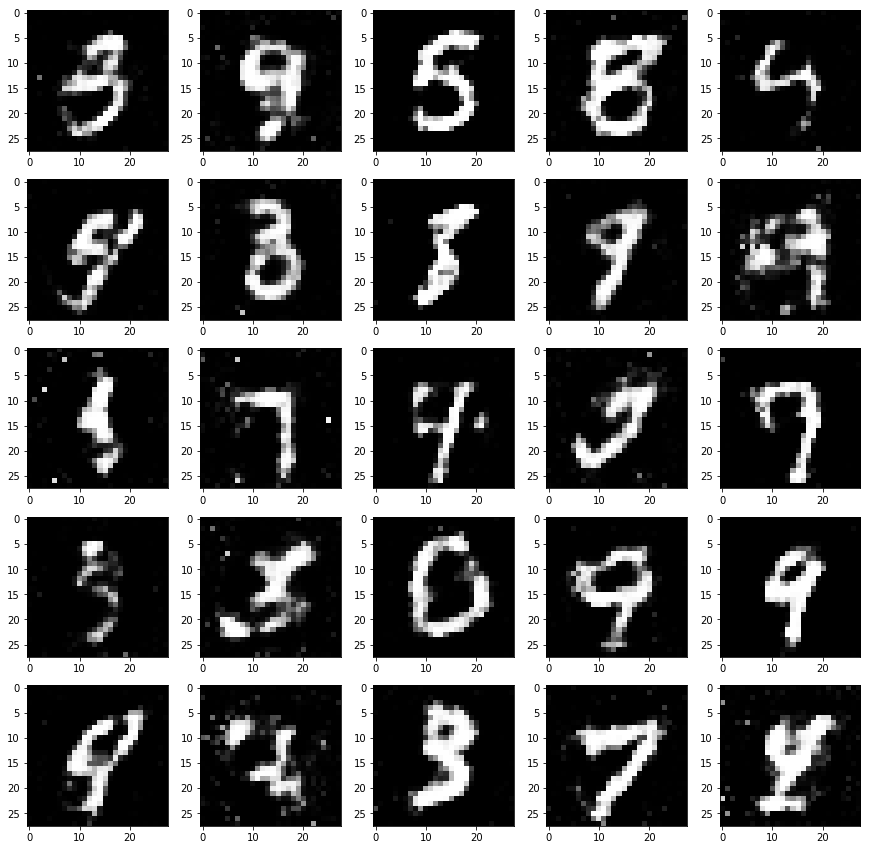

Epoch=  21000  Discriminator Loss = 0.380  Discriminator Accuracy = 0.468  Generator Loss = 1.702  Generator Accuracy = 0.110
Epoch=  22000  Discriminator Loss = 0.380  Discriminator Accuracy = 0.480  Generator Loss = 2.145  Generator Accuracy = 0.020
Epoch=  23000  Discriminator Loss = 0.373  Discriminator Accuracy = 0.475  Generator Loss = 1.709  Generator Accuracy = 0.070
Epoch=  24000  Discriminator Loss = 0.435  Discriminator Accuracy = 0.417  Generator Loss = 1.445  Generator Accuracy = 0.220
Epoch=  25000  Discriminator Loss = 0.395  Discriminator Accuracy = 0.463  Generator Loss = 1.658  Generator Accuracy = 0.095


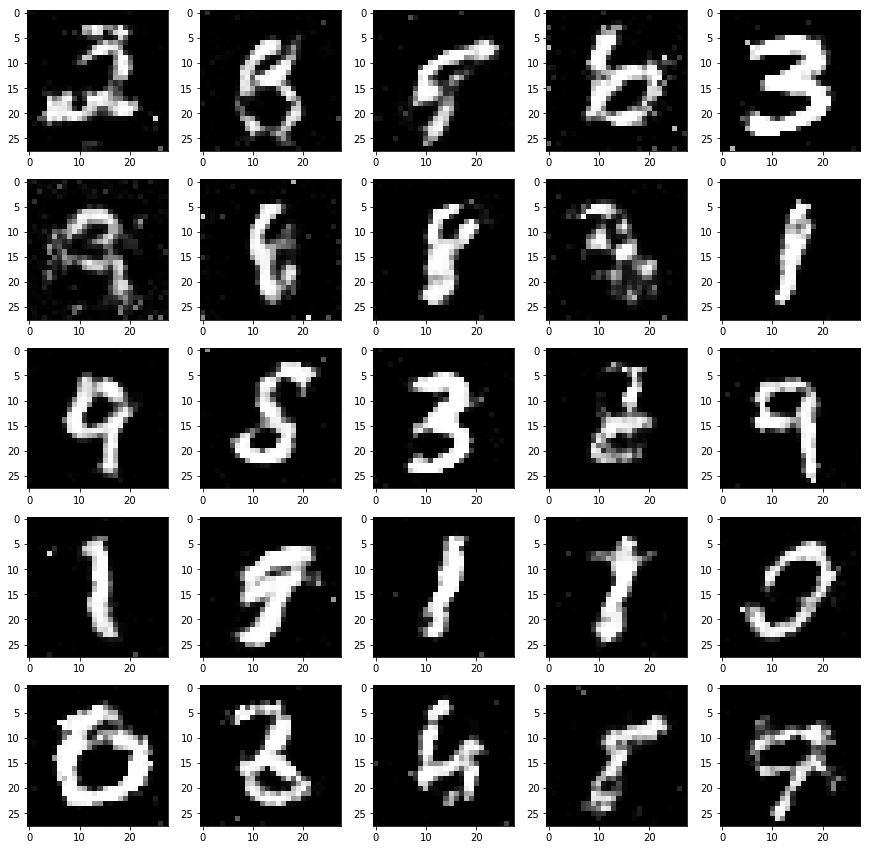

Epoch=  26000  Discriminator Loss = 0.385  Discriminator Accuracy = 0.500  Generator Loss = 2.024  Generator Accuracy = 0.035
Epoch=  27000  Discriminator Loss = 0.414  Discriminator Accuracy = 0.472  Generator Loss = 1.729  Generator Accuracy = 0.100
Epoch=  28000  Discriminator Loss = 0.415  Discriminator Accuracy = 0.475  Generator Loss = 1.918  Generator Accuracy = 0.060
Epoch=  29000  Discriminator Loss = 0.378  Discriminator Accuracy = 0.472  Generator Loss = 1.875  Generator Accuracy = 0.085
Epoch=  30000  Discriminator Loss = 0.372  Discriminator Accuracy = 0.492  Generator Loss = 1.807  Generator Accuracy = 0.070


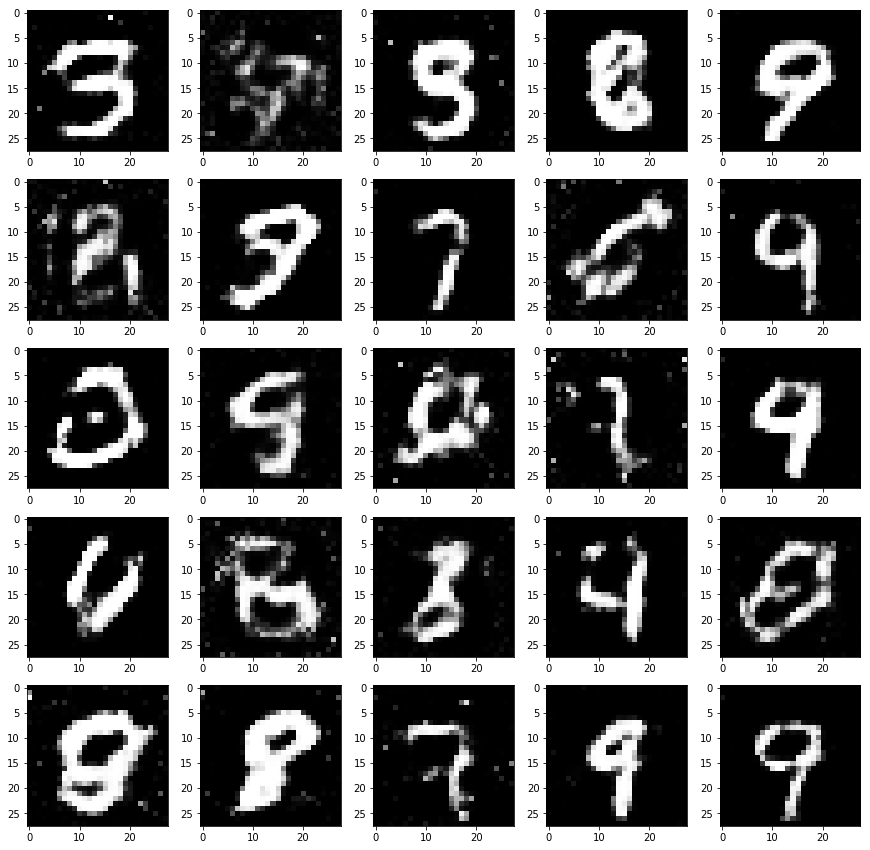

Epoch=  31000  Discriminator Loss = 0.401  Discriminator Accuracy = 0.450  Generator Loss = 1.631  Generator Accuracy = 0.115
Epoch=  32000  Discriminator Loss = 0.380  Discriminator Accuracy = 0.482  Generator Loss = 2.092  Generator Accuracy = 0.055
Epoch=  33000  Discriminator Loss = 0.389  Discriminator Accuracy = 0.475  Generator Loss = 1.760  Generator Accuracy = 0.095
Epoch=  34000  Discriminator Loss = 0.388  Discriminator Accuracy = 0.477  Generator Loss = 1.907  Generator Accuracy = 0.065
Epoch=  35000  Discriminator Loss = 0.383  Discriminator Accuracy = 0.480  Generator Loss = 1.743  Generator Accuracy = 0.070


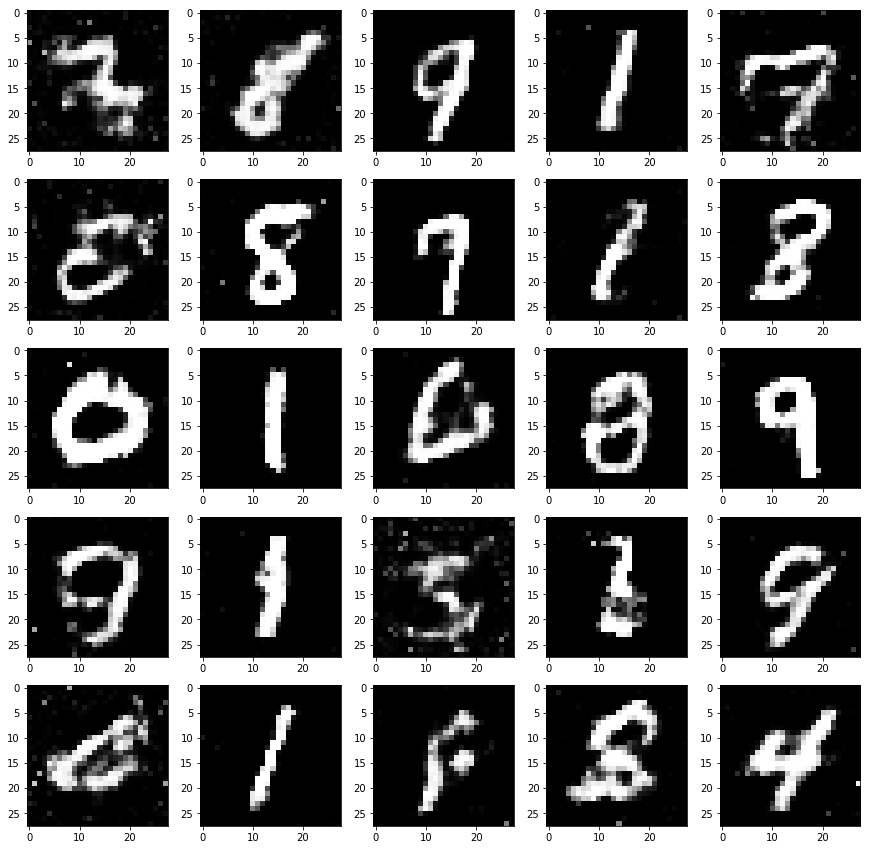

Epoch=  36000  Discriminator Loss = 0.397  Discriminator Accuracy = 0.465  Generator Loss = 1.525  Generator Accuracy = 0.170
Epoch=  37000  Discriminator Loss = 0.375  Discriminator Accuracy = 0.485  Generator Loss = 1.891  Generator Accuracy = 0.080
Epoch=  38000  Discriminator Loss = 0.386  Discriminator Accuracy = 0.468  Generator Loss = 1.787  Generator Accuracy = 0.055
Epoch=  39000  Discriminator Loss = 0.404  Discriminator Accuracy = 0.460  Generator Loss = 1.659  Generator Accuracy = 0.115
Epoch=  40000  Discriminator Loss = 0.397  Discriminator Accuracy = 0.477  Generator Loss = 1.964  Generator Accuracy = 0.055


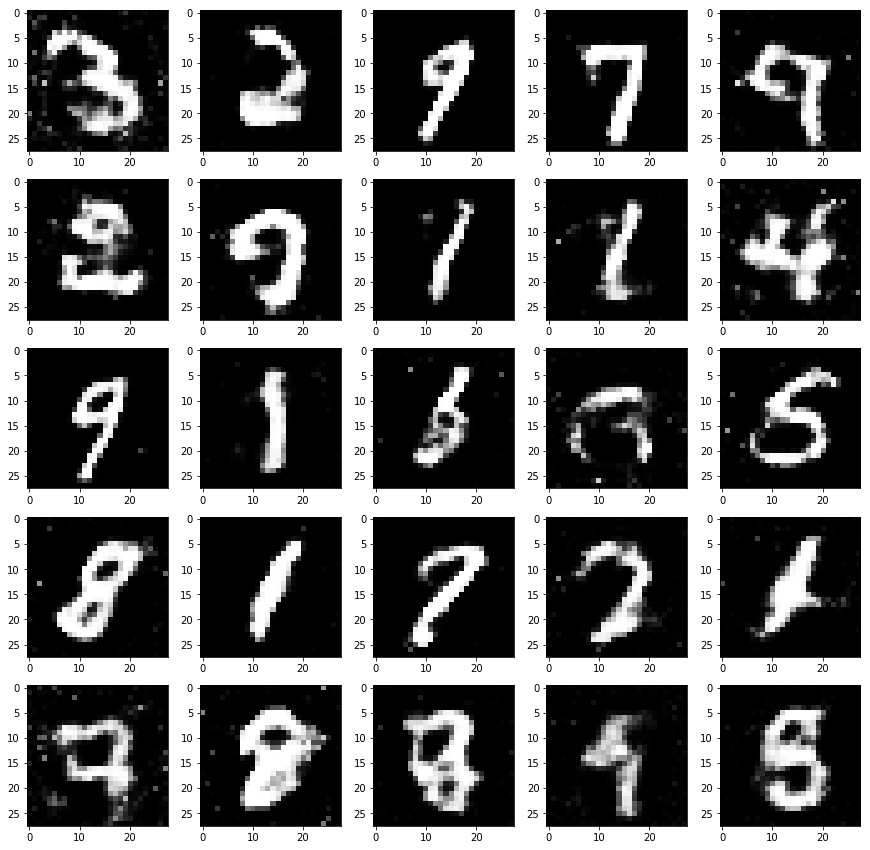

Epoch=  41000  Discriminator Loss = 0.418  Discriminator Accuracy = 0.458  Generator Loss = 1.651  Generator Accuracy = 0.110
Epoch=  42000  Discriminator Loss = 0.401  Discriminator Accuracy = 0.482  Generator Loss = 1.794  Generator Accuracy = 0.100
Epoch=  43000  Discriminator Loss = 0.385  Discriminator Accuracy = 0.485  Generator Loss = 2.014  Generator Accuracy = 0.075
Epoch=  44000  Discriminator Loss = 0.365  Discriminator Accuracy = 0.485  Generator Loss = 2.001  Generator Accuracy = 0.040
Epoch=  45000  Discriminator Loss = 0.415  Discriminator Accuracy = 0.432  Generator Loss = 1.568  Generator Accuracy = 0.140


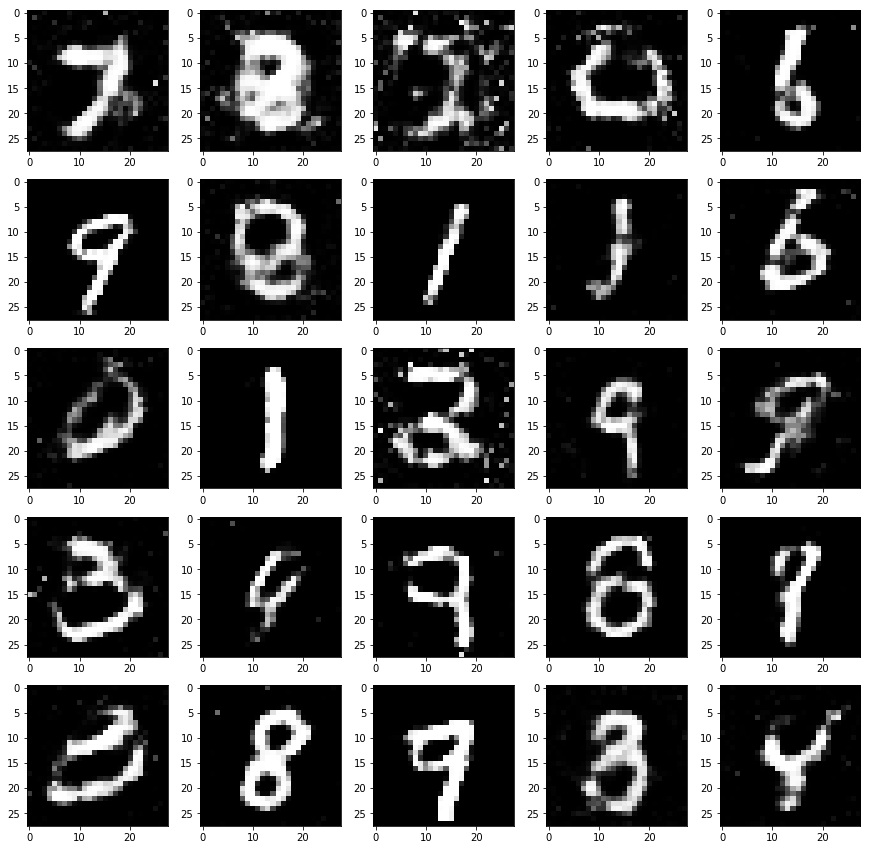

Epoch=  46000  Discriminator Loss = 0.404  Discriminator Accuracy = 0.472  Generator Loss = 1.762  Generator Accuracy = 0.100
Epoch=  47000  Discriminator Loss = 0.423  Discriminator Accuracy = 0.477  Generator Loss = 1.966  Generator Accuracy = 0.085
Epoch=  48000  Discriminator Loss = 0.372  Discriminator Accuracy = 0.490  Generator Loss = 1.744  Generator Accuracy = 0.095
Epoch=  49000  Discriminator Loss = 0.388  Discriminator Accuracy = 0.470  Generator Loss = 1.772  Generator Accuracy = 0.105
Epoch=  50000  Discriminator Loss = 0.398  Discriminator Accuracy = 0.472  Generator Loss = 1.689  Generator Accuracy = 0.070


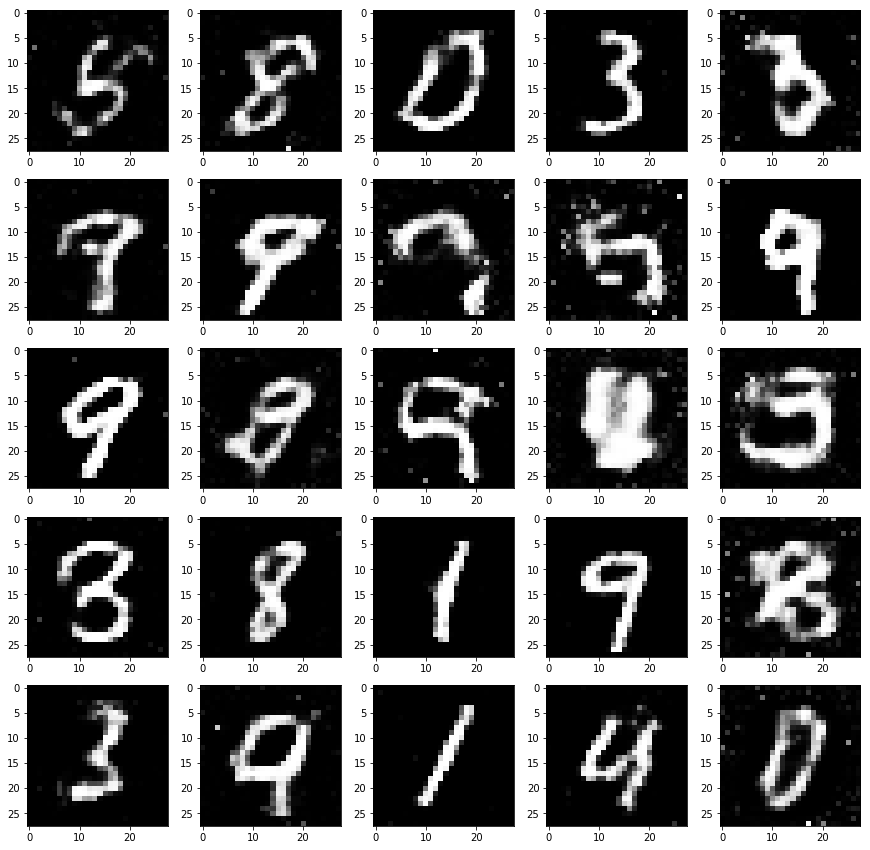

Epoch=  51000  Discriminator Loss = 0.373  Discriminator Accuracy = 0.482  Generator Loss = 1.671  Generator Accuracy = 0.100
Epoch=  52000  Discriminator Loss = 0.388  Discriminator Accuracy = 0.458  Generator Loss = 1.641  Generator Accuracy = 0.175
Epoch=  53000  Discriminator Loss = 0.383  Discriminator Accuracy = 0.460  Generator Loss = 1.640  Generator Accuracy = 0.105
Epoch=  54000  Discriminator Loss = 0.402  Discriminator Accuracy = 0.460  Generator Loss = 1.846  Generator Accuracy = 0.070
Epoch=  55000  Discriminator Loss = 0.408  Discriminator Accuracy = 0.477  Generator Loss = 1.961  Generator Accuracy = 0.055


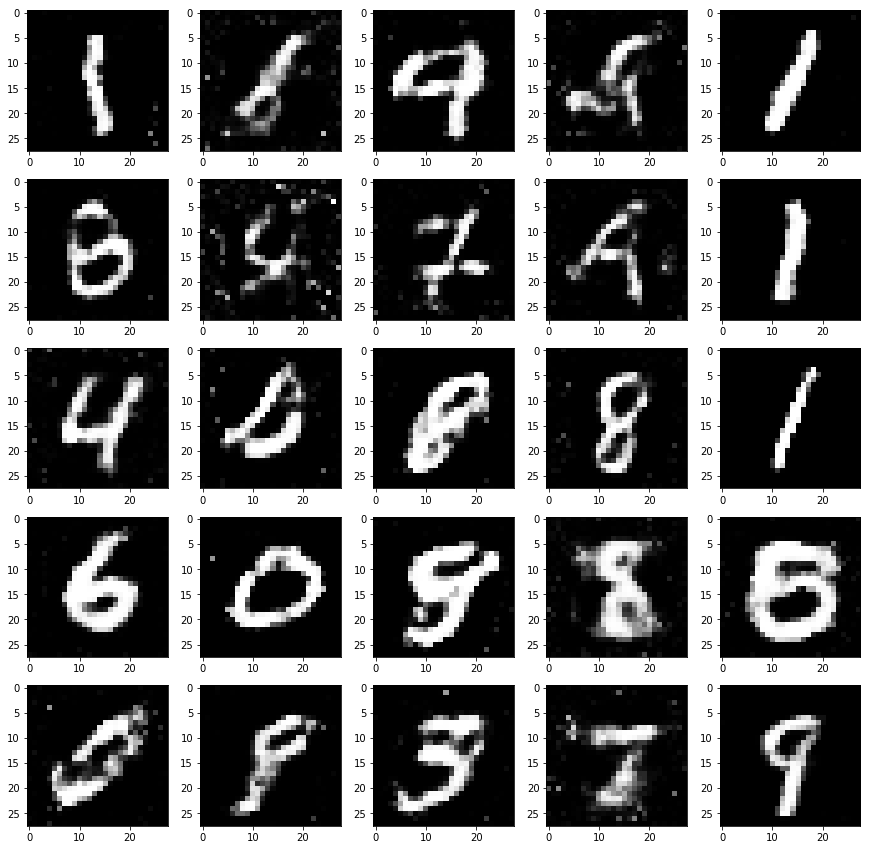

Epoch=  56000  Discriminator Loss = 0.393  Discriminator Accuracy = 0.475  Generator Loss = 1.656  Generator Accuracy = 0.090
Epoch=  57000  Discriminator Loss = 0.395  Discriminator Accuracy = 0.458  Generator Loss = 1.539  Generator Accuracy = 0.140
Epoch=  58000  Discriminator Loss = 0.389  Discriminator Accuracy = 0.477  Generator Loss = 1.727  Generator Accuracy = 0.095
Epoch=  59000  Discriminator Loss = 0.395  Discriminator Accuracy = 0.460  Generator Loss = 1.717  Generator Accuracy = 0.140
Epoch=  60000  Discriminator Loss = 0.374  Discriminator Accuracy = 0.490  Generator Loss = 1.836  Generator Accuracy = 0.085


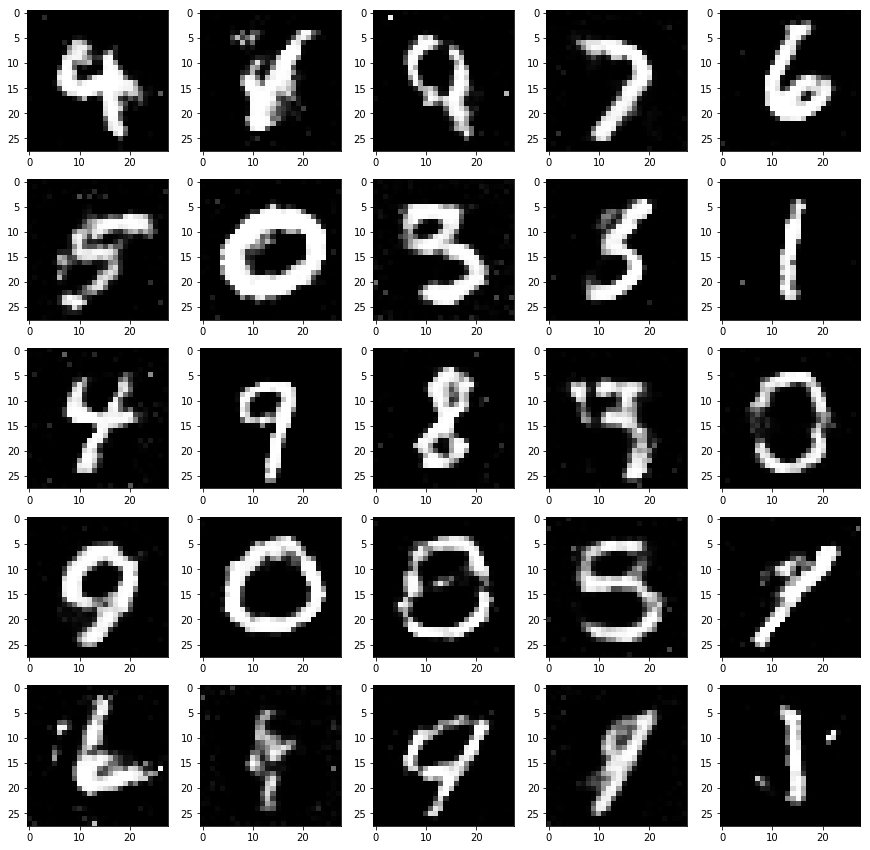

Epoch=  61000  Discriminator Loss = 0.392  Discriminator Accuracy = 0.475  Generator Loss = 1.872  Generator Accuracy = 0.060
Epoch=  62000  Discriminator Loss = 0.412  Discriminator Accuracy = 0.487  Generator Loss = 1.812  Generator Accuracy = 0.055
Epoch=  63000  Discriminator Loss = 0.395  Discriminator Accuracy = 0.465  Generator Loss = 1.741  Generator Accuracy = 0.125
Epoch=  64000  Discriminator Loss = 0.393  Discriminator Accuracy = 0.470  Generator Loss = 1.694  Generator Accuracy = 0.115
Epoch=  65000  Discriminator Loss = 0.412  Discriminator Accuracy = 0.495  Generator Loss = 2.304  Generator Accuracy = 0.035


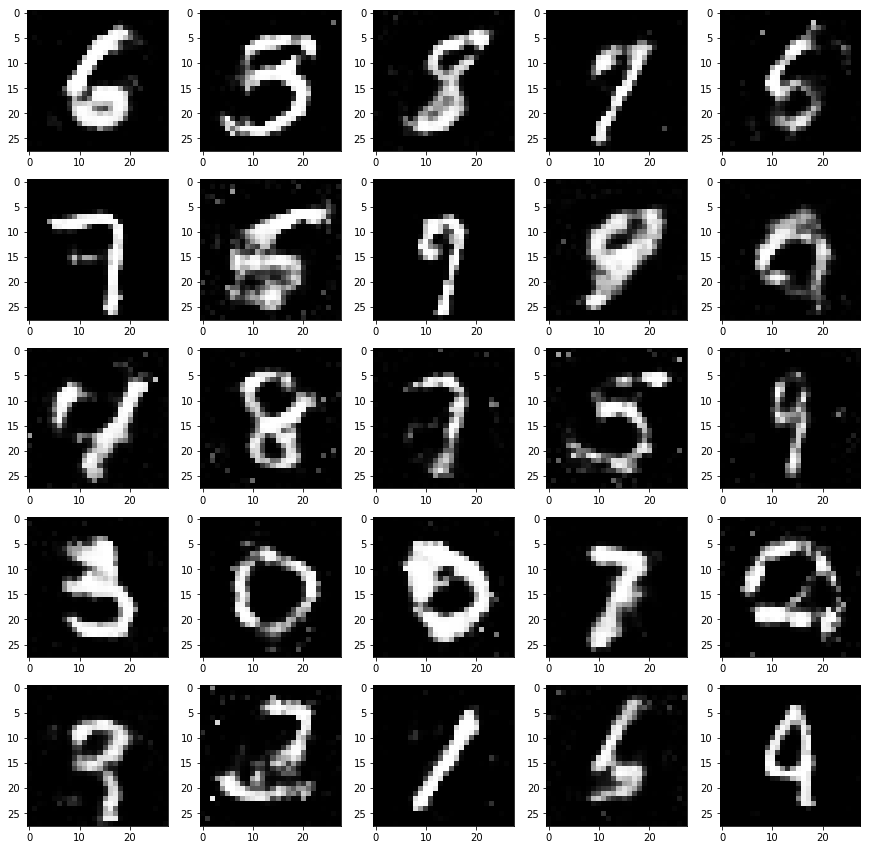

Epoch=  66000  Discriminator Loss = 0.407  Discriminator Accuracy = 0.463  Generator Loss = 1.682  Generator Accuracy = 0.085
Epoch=  67000  Discriminator Loss = 0.423  Discriminator Accuracy = 0.455  Generator Loss = 1.735  Generator Accuracy = 0.100
Epoch=  68000  Discriminator Loss = 0.375  Discriminator Accuracy = 0.495  Generator Loss = 1.845  Generator Accuracy = 0.045
Epoch=  69000  Discriminator Loss = 0.412  Discriminator Accuracy = 0.475  Generator Loss = 1.647  Generator Accuracy = 0.090
Epoch=  70000  Discriminator Loss = 0.391  Discriminator Accuracy = 0.468  Generator Loss = 1.423  Generator Accuracy = 0.180


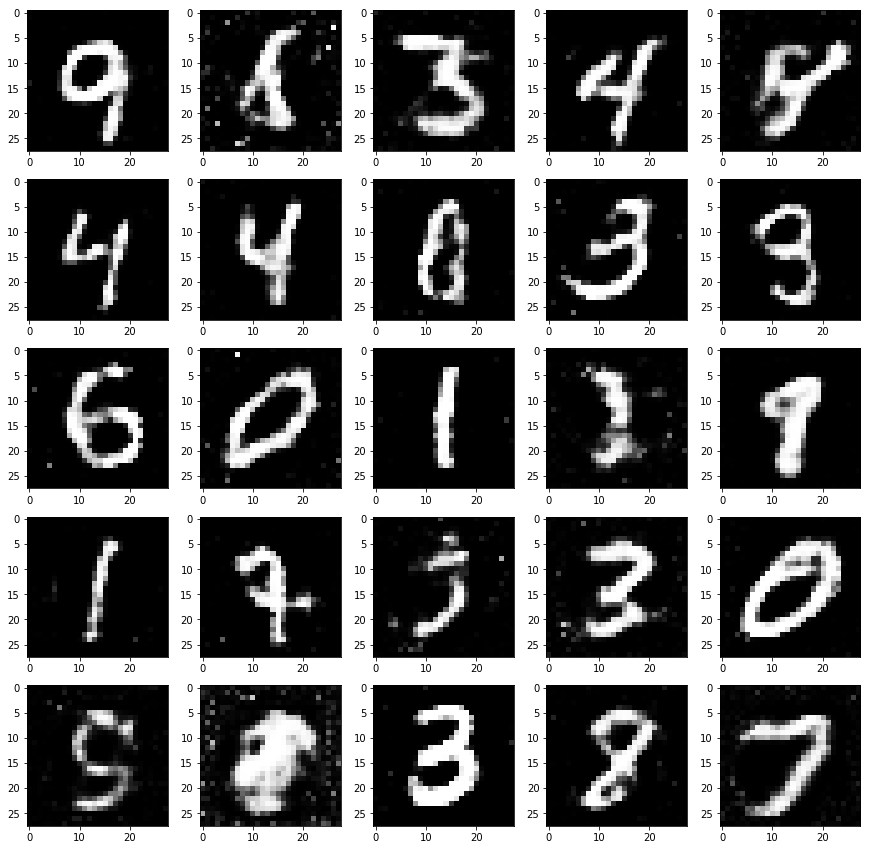

Epoch=  71000  Discriminator Loss = 0.391  Discriminator Accuracy = 0.477  Generator Loss = 1.808  Generator Accuracy = 0.050
Epoch=  72000  Discriminator Loss = 0.425  Discriminator Accuracy = 0.458  Generator Loss = 1.544  Generator Accuracy = 0.100
Epoch=  73000  Discriminator Loss = 0.403  Discriminator Accuracy = 0.453  Generator Loss = 1.681  Generator Accuracy = 0.130
Epoch=  74000  Discriminator Loss = 0.403  Discriminator Accuracy = 0.465  Generator Loss = 1.655  Generator Accuracy = 0.115
Epoch=  75000  Discriminator Loss = 0.378  Discriminator Accuracy = 0.477  Generator Loss = 1.595  Generator Accuracy = 0.135


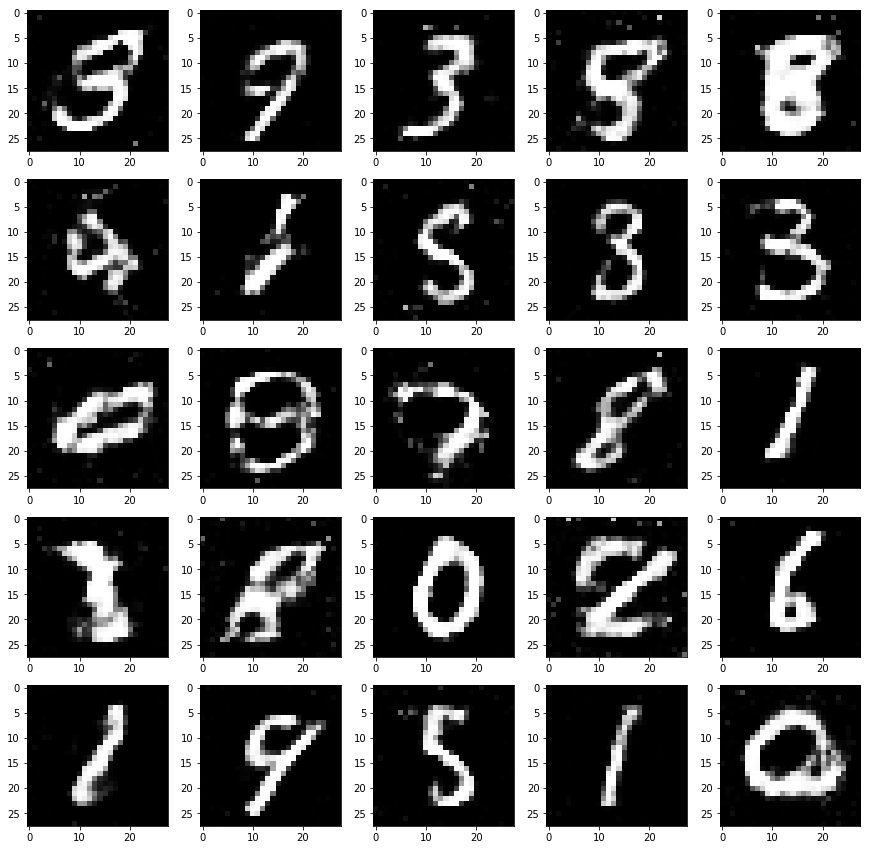

Epoch=  76000  Discriminator Loss = 0.397  Discriminator Accuracy = 0.485  Generator Loss = 1.817  Generator Accuracy = 0.060
Epoch=  77000  Discriminator Loss = 0.402  Discriminator Accuracy = 0.455  Generator Loss = 1.492  Generator Accuracy = 0.165
Epoch=  78000  Discriminator Loss = 0.399  Discriminator Accuracy = 0.465  Generator Loss = 1.816  Generator Accuracy = 0.065
Epoch=  79000  Discriminator Loss = 0.419  Discriminator Accuracy = 0.443  Generator Loss = 1.725  Generator Accuracy = 0.110
Epoch=  80000  Discriminator Loss = 0.385  Discriminator Accuracy = 0.480  Generator Loss = 1.748  Generator Accuracy = 0.095


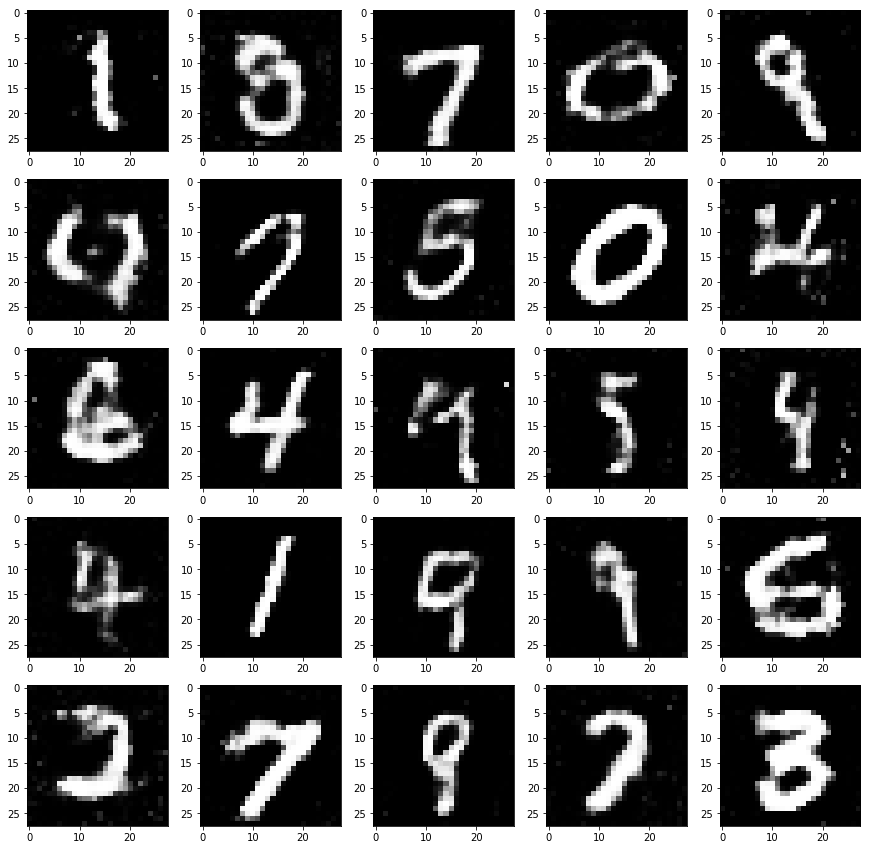

Epoch=  81000  Discriminator Loss = 0.397  Discriminator Accuracy = 0.458  Generator Loss = 1.565  Generator Accuracy = 0.135
Epoch=  82000  Discriminator Loss = 0.406  Discriminator Accuracy = 0.472  Generator Loss = 1.737  Generator Accuracy = 0.085
Epoch=  83000  Discriminator Loss = 0.410  Discriminator Accuracy = 0.468  Generator Loss = 1.907  Generator Accuracy = 0.085
Epoch=  84000  Discriminator Loss = 0.426  Discriminator Accuracy = 0.470  Generator Loss = 1.627  Generator Accuracy = 0.070
Epoch=  85000  Discriminator Loss = 0.421  Discriminator Accuracy = 0.485  Generator Loss = 2.239  Generator Accuracy = 0.035


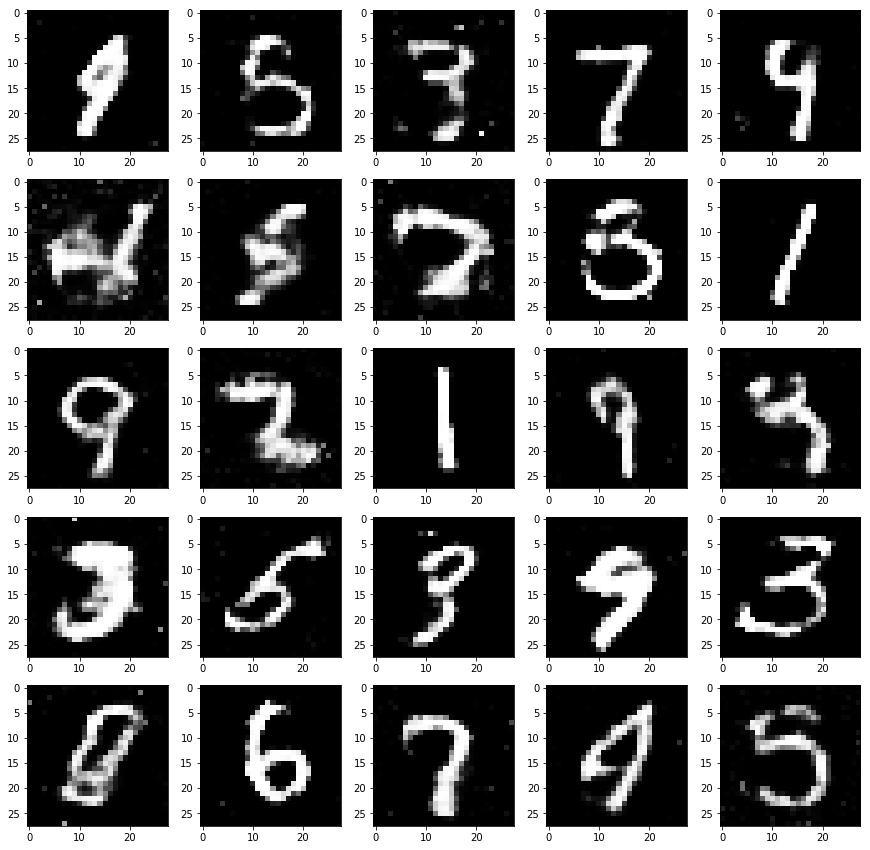

Epoch=  86000  Discriminator Loss = 0.398  Discriminator Accuracy = 0.445  Generator Loss = 1.709  Generator Accuracy = 0.135
Epoch=  87000  Discriminator Loss = 0.398  Discriminator Accuracy = 0.453  Generator Loss = 1.659  Generator Accuracy = 0.095
Epoch=  88000  Discriminator Loss = 0.437  Discriminator Accuracy = 0.475  Generator Loss = 2.095  Generator Accuracy = 0.035
Epoch=  89000  Discriminator Loss = 0.409  Discriminator Accuracy = 0.487  Generator Loss = 1.904  Generator Accuracy = 0.045
Epoch=  90000  Discriminator Loss = 0.400  Discriminator Accuracy = 0.482  Generator Loss = 1.997  Generator Accuracy = 0.070


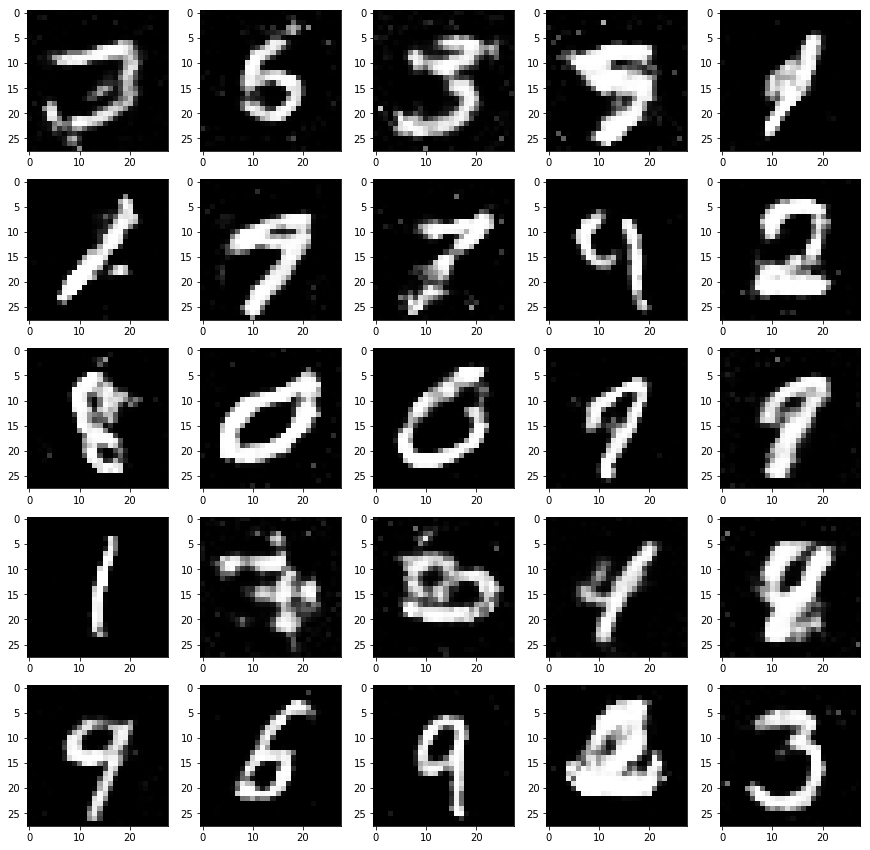

Epoch=  91000  Discriminator Loss = 0.414  Discriminator Accuracy = 0.470  Generator Loss = 1.749  Generator Accuracy = 0.110
Epoch=  92000  Discriminator Loss = 0.390  Discriminator Accuracy = 0.487  Generator Loss = 2.125  Generator Accuracy = 0.025
Epoch=  93000  Discriminator Loss = 0.392  Discriminator Accuracy = 0.475  Generator Loss = 1.831  Generator Accuracy = 0.070
Epoch=  94000  Discriminator Loss = 0.379  Discriminator Accuracy = 0.490  Generator Loss = 1.934  Generator Accuracy = 0.070
Epoch=  95000  Discriminator Loss = 0.401  Discriminator Accuracy = 0.492  Generator Loss = 2.002  Generator Accuracy = 0.035


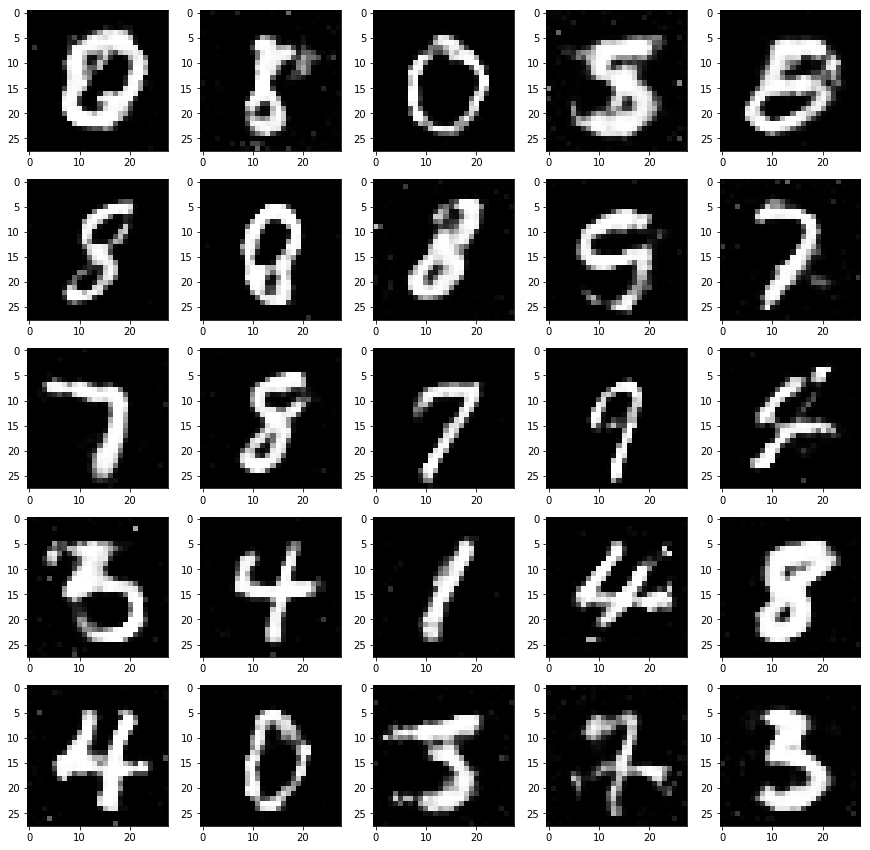

Epoch=  96000  Discriminator Loss = 0.393  Discriminator Accuracy = 0.460  Generator Loss = 1.803  Generator Accuracy = 0.070
Epoch=  97000  Discriminator Loss = 0.395  Discriminator Accuracy = 0.472  Generator Loss = 1.705  Generator Accuracy = 0.160
Epoch=  98000  Discriminator Loss = 0.427  Discriminator Accuracy = 0.450  Generator Loss = 1.668  Generator Accuracy = 0.100
Epoch=  99000  Discriminator Loss = 0.418  Discriminator Accuracy = 0.455  Generator Loss = 1.731  Generator Accuracy = 0.105
Epoch=  100000  Discriminator Loss = 0.394  Discriminator Accuracy = 0.458  Generator Loss = 1.720  Generator Accuracy = 0.160


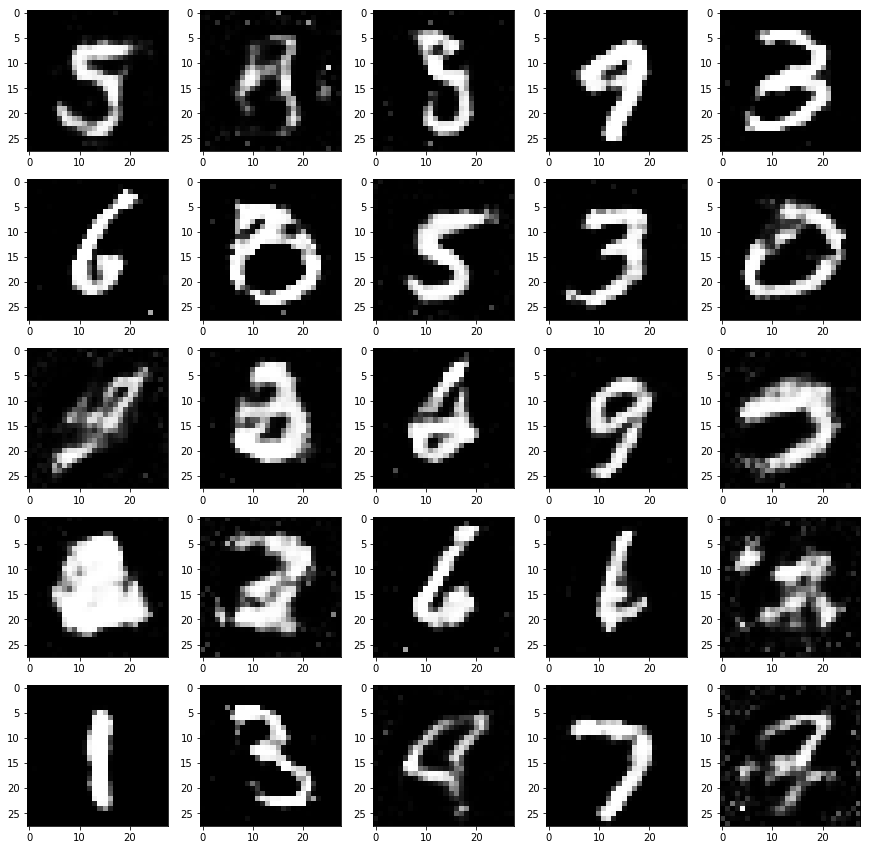

In [32]:
####GAN algo

loss_gen_final =[]
loss_disc_final =[]
eps =[]
def train_the_GAN(epochs,batch_size,image_data):
    #pass
    for i in range(epochs):
        random_noise = np.random.normal(0,1,size=(batch_size,noise_dim))
        fake_images = G.predict(random_noise)
        #print (fake_images.shape)
        #fake_images = G.predict(random_noise)
        #print (type(fake_images))
        tr_idx = np.random.randint(0, image_data.shape[0], batch_size) #revisit
        imgs = image_data[tr_idx]
        #print (len(imgs))
        #print (imgs.shape)
        #print (fake_images.shape)
        data_overall = np.concatenate((imgs,fake_images))
        
        labels_real = 0.9*(np.ones(batch_size))
        labels_fake = np.zeros(batch_size)
        #labels_fake[:batch_size] = 0.1
        labels_overall = np.concatenate((labels_real,labels_fake))
        
        D.trainable = True
        
        D.train_on_batch(data_overall,labels_overall)
        
        loss_disc = D.evaluate(data_overall,labels_overall,verbose=0) 
        
        
        
        
        random_noise = np.random.normal(0,1,size=(batch_size,noise_dim))
        labels_gen =np.ones(batch_size)
        #labels_gen =np.zeros(batch_size)
        D.trainable = False
        gan.train_on_batch(random_noise,labels_gen)
        
        loss_gen = gan.evaluate(random_noise,labels_gen,verbose=0)
        
        if (i+1)%20 ==0:
            
            loss_disc_final.append(loss_disc)
            loss_gen_final.append(loss_gen)
        
        #eps.append(epochs)
        
        
        if (i+1)%1000==0:
            
            print ("Epoch= ", i+1, end =' ')
            print (" Discriminator Loss = %0.3f" %loss_disc[0], end =' ')
            print (" Discriminator Accuracy = %0.3f" %loss_disc[1], end =' ')
            print (" Generator Loss = %0.3f" %loss_gen[0], end = ' ')
            print (" Generator Accuracy = %0.3f" %loss_gen[1])
            
        if (i+1)%5000==0:
            
            img_frm_gen = G.predict(random_noise) 
            img_frm_gen = 0.5*img_frm_gen + 0.5
            
            fig, ax = plt.subplots(nrows=5,ncols=5,figsize=(15,15))

            cnt =0
            for i in range(5):
                for j in range(5):
                    #img_noise = G.predict()
                    ax[i,j].imshow(img_frm_gen[cnt].reshape(28,28),cmap='gray')
                    cnt = cnt + 1
                    
            plt.show()
        
        
            
            
            
            
            
        
    return loss_disc_final,loss_gen_final,eps
        
        
        
        
    
    
loss_disc, loss_gen,epochs = train_the_GAN(100000,200,train_mnist_images)

#print (test_mod)
        
        
        
        
        
        
        
        

5000


/home/wenqi/anaconda2/envs/RL/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "top right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


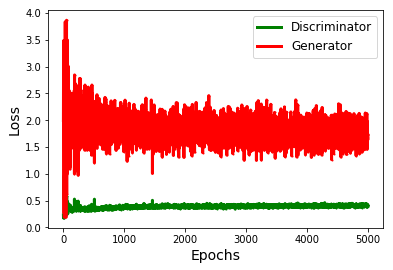

In [33]:
import matplotlib.pyplot as plt

D_loss = []
G_loss = []

for i,j in zip(loss_disc,loss_gen):
    
    D_loss.append(i[0])
    G_loss.append(j[0])


epochs = range(len(D_loss)) 
print(len(D_loss))
plt.plot(epochs,D_loss,color="green",linewidth =3, marker ="o",markerfacecolor="green",markersize=1,label ='Discriminator')
plt.plot(epochs,G_loss,color="red",linewidth =3, marker ="o",markerfacecolor="red",markersize=1,label ='Generator')
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Loss',fontsize=14)
plt.legend(loc='top right',fontsize=12)               
    

    
    



In [63]:
!nvidia-smi

Sat Nov  2 23:35:10 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.09       Driver Version: 430.09       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:02:00.0  On |                  N/A |
| 24%   45C    P2    52W / 250W |  10765MiB / 11170MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

5000


/home/wenqi/anaconda2/envs/RL/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "top right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


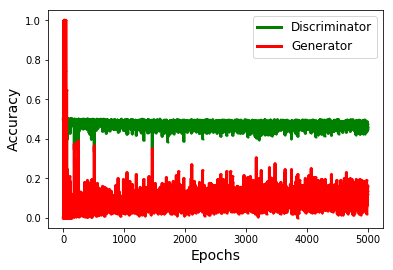

In [34]:
D_acc =[]
G_acc =[]

for i,j in zip(loss_disc,loss_gen):
    
    D_acc.append(i[1])
    G_acc.append(j[1])

epochs = range(len(D_acc)) 
print(len(D_acc))
plt.plot(epochs,D_acc,color="green",linewidth =3, marker ="o",markerfacecolor="green",markersize=1,label ='Discriminator')
plt.plot(epochs,G_acc,color="red",linewidth =3, marker ="o",markerfacecolor="red",markersize=1,label ='Generator')
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.legend(loc='top right',fontsize=12)               
    

    
    



In [ ]:
!sudo kill -9 22258// sudo kill -9 22258

[sudo] password for wenqi: 

In [34]:
print ("Epoch= %2.3f"% 2.6543)

Epoch= 2.654


In [38]:
print ("Epoch= ", 1, end =' ')
print (" Loss of Discriminator = %5.3f" %2.6543, end =' ')
print (" Accuracy of Discriminator = %5.3f" %65, end =' ')
print (" Loss of Generator = %5.3f" %2.6543, end = ' ')
print (" Accuracy of Generator = %5.3f" %45)

Epoch=  1  Loss of Discriminator = 2.654  Accuracy of Discriminator = 65.000  Loss of Generator = 2.654  Accuracy of Generator = 45.000 

In [69]:
0.2*(np.ones(5))

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [70]:
test = np.zeros(5)

In [71]:
test[1]

0.0

In [72]:
test[:5]=2

In [73]:
test

array([2., 2., 2., 2., 2.])

In [66]:

np.random.normal(size=(5,4))

array([[-0.18803826,  1.35270009,  1.64255383, -0.39539231],
       [-0.20445074,  0.02347687, -1.10848026,  2.10021321],
       [-0.8023929 , -0.50189501,  1.51925666,  0.53800833],
       [-0.37263324,  1.51316104, -0.55238793,  0.84376386],
       [-1.74621825,  0.43208259, -0.22919409, -0.38187687]])